In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('bank-additional-full.csv', sep=';') # loading the dataset using ';' delimeter

## Pre-Processing

In this step I have prepare the dataset for modeling by encoding categorical variables.
Since Logistic Regression and Decision Trees require numeric inputs, categorical columns such as job, marital status, and education must be converted into numerical form.

In [3]:
df.drop(columns='duration', inplace=True)

In [4]:
# Converting categorical features into numbers

df_encoded = pd.get_dummies(df, columns=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'], drop_first=True)

#### Encoding target column 'y'

In [5]:
# mapping the target column into number

df_encoded['y'] = df_encoded['y'].map({'yes' : 1, 'no' : 0})

# Train Decision Tree Classifier

In this step i have train a Decision Tree classifier to predict whether a customer will accept a personal loan offer. Decision Trees are easy to interpret and help us identify important customer groups and features that influence loan acceptance.

In [6]:
# Separting target and features columns

X = df_encoded.drop('y', axis=1)
Y = df_encoded['y']

In [7]:
# Train-Test Split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [8]:
X_train.shape, Y_train.shape

((32950, 52), (32950,))

In [9]:
# Training model

dt = DecisionTreeClassifier(max_depth=5, random_state=42
)

dt.fit(X_train, Y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [10]:
y_pred_dt = dt.predict(X_test)

## Evaluation

In [11]:
# Classification Report
report_dict = classification_report(Y_test, y_pred_dt, output_dict=True)

# Convert to DataFrame
df_report = pd.DataFrame(report_dict).T.round(2)

print("\n" + "Decision Tree Classification Report".center(60, "=") + "\n")
print(df_report)

accuracy = accuracy_score(Y_test, y_pred_dt)
print("\n" + "Model Accuracy:".ljust(30) + f"{accuracy * 100:.2f}%")
print("\n" + "="*60 + "\n")


============Decision Tree Classification Report=============

              precision  recall  f1-score  support
0                  0.91    0.99      0.95   7310.0
1                  0.68    0.25      0.36    928.0
accuracy           0.90    0.90      0.90      0.9
macro avg          0.80    0.62      0.66   8238.0
weighted avg       0.89    0.90      0.88   8238.0

Model Accuracy:               90.22%




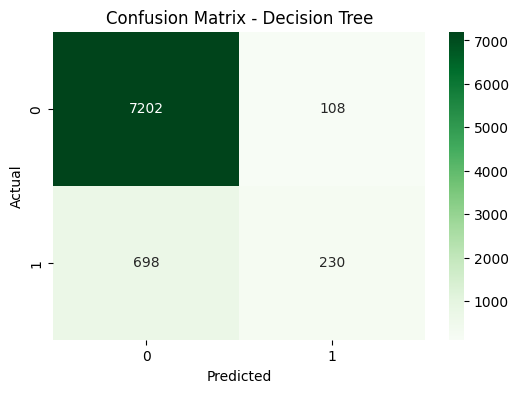

In [12]:
# Visualizing Confusion Matrix using Heatmap
cm = confusion_matrix(Y_test, y_pred_dt)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Insights

### Feature Importance

I check which features the Decision Tree used the most to split the data. 

Higher importance = more influence on loan acceptance.

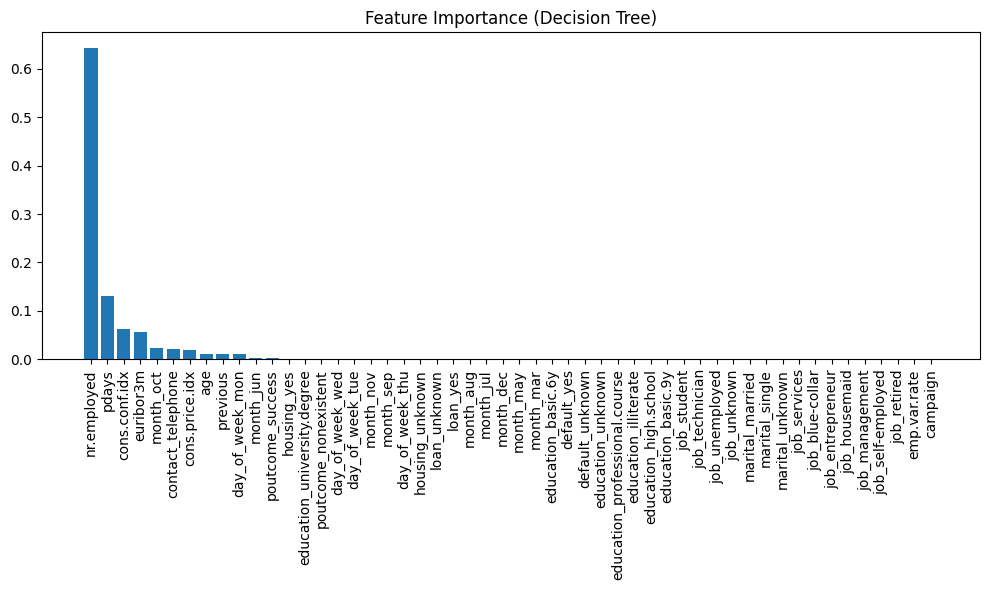

In [13]:
importances = dt.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importance (Decision Tree)")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

### Which customer groups accept more? (Business insight)

##### Loan acceptance rate by job

In [14]:
job_accept = df.groupby('job')['y'].value_counts(normalize=True).unstack()
job_accept

y,no,yes
job,,
admin.,0.870274,0.129726
blue-collar,0.931057,0.068943
entrepreneur,0.914835,0.085165
housemaid,0.900000,0.100000
management,0.887825,0.112175
retired,0.747674,0.252326
self-employed,0.895144,0.104856
services,0.918619,0.081381
student,0.685714,0.314286


#### Loan acceptance rate by marital status

In [15]:
marital_accept = df.groupby('marital')['y'].value_counts(normalize=True).unstack()
marital_accept

y,no,yes
marital,,
divorced,0.896791,0.103209
married,0.898427,0.101573
single,0.859959,0.140041
unknown,0.850000,0.150000


#### Loan acceptance rate by age group (bins)

In [16]:
df['age_group'] = pd.cut(df['age'], bins=[17,25,35,45,60,100], labels=['18-25','26-35','36-45','46-60','60+'])

age_accept = df.groupby('age_group')['y'].value_counts(normalize=True).unstack()
age_accept

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9744\3121083674.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_accept = df.groupby('age_group')['y'].value_counts(normalize=True).unstack()


y,no,yes
age_group,,
18-25,0.791090,0.208910
26-35,0.882805,0.117195
36-45,0.914902,0.085098
46-60,0.904404,0.095596
60+,0.545055,0.454945


## Insights Summary

1. Job

- Students and retired customers accept loans the most.
- Blue-collar and services jobs have the lowest acceptance.

2. Marital Status

- Single customers accept loans more than married or divorced customers.

3. Age Groups

- 60+ customers have the highest acceptance.
- Young adults (18–25) also accept more.
- Middle-aged groups (26–60) accept the least.

Loan marketing should focus on Students, Retired individuals, Young adults, Older customers with financial needs